In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
import os 
os.chdir(r"C:\Users\HP\Desktop\Python\Machine Learning\Time Series")

In [3]:
df = pd.read_csv('Tata_Power.csv')

In [4]:
df.columns

Index(['Date', 'Unnamed: 1', 'OPEN', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'No of trades '],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 1','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'No of trades '],axis=1)

In [6]:
df.columns

Index(['Date', 'OPEN'], dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
print(type(df.Date[0]))
df = df.sort_values(by='Date',ascending=True)
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,OPEN
168,2022-04-11,281.00
167,2022-04-12,283.35
166,2022-04-13,278.60
165,2022-04-18,267.90
164,2022-04-19,260.50
...,...,...
4,2022-12-08,226.00
3,2022-12-09,225.90
2,2022-12-12,219.75
1,2022-12-13,218.80


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 168 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   OPEN    169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


<AxesSubplot:xlabel='Date'>

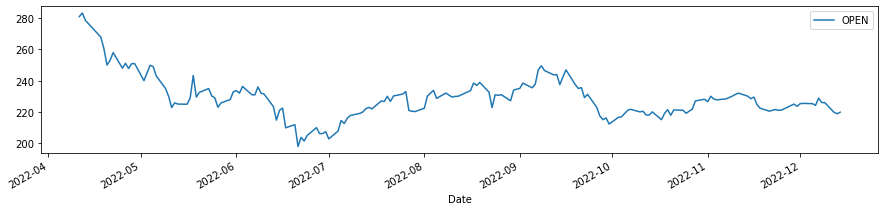

In [9]:
df.plot.line(x ='Date',y = 'OPEN',figsize=(15,3))

In [10]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [11]:
data2=df.set_index("Date")
data2.head()

,OPEN
Date,
2022-04-11,281.00
2022-04-12,283.35
2022-04-13,278.60
2022-04-18,267.90
2022-04-19,260.50


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2022-04-11 to 2022-12-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    169 non-null    float64
dtypes: float64(1)
memory usage: 2.6+ KB


#### Manual Model

* Alpha ( Smoothing) = 0.7 & beta ( Trend ) = 0.5
* Initial ( Smoothing) = 281.00 ( Y1 ) & Initial ( Trend ) = 2.35 ( y2 - y1)

In [13]:
model2 = Holt(data2,initial_level=281.00,initial_trend=2.35,initialization_method='known').fit(
        smoothing_level=0.7,smoothing_trend=0.5,optimized=False,remove_bias=False,method='ls')
model2.params

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.7,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 281.0,
 'initial_trend': 2.35,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [14]:
round(model2.fittedvalues)

Date
2022-04-11    283.0
2022-04-12    283.0
2022-04-13    285.0
2022-04-18    280.0
2022-04-19    267.0
              ...  
2022-12-08    229.0
2022-12-09    227.0
2022-12-12    226.0
2022-12-13    219.0
2022-12-14    216.0
Length: 169, dtype: float64

In [15]:
df = pd.DataFrame(
    np.c_[data2.OPEN, model2.level, model2.trend, model2.fittedvalues],
    columns=["Actual","Level","Trend","Forecast"])
df.head()

,Actual,Level,Trend,Forecast
0,281.00,281.705000,1.527500,283.350000
1,283.35,283.314750,1.568625,283.232500
2,278.60,280.485013,-0.630556,284.883375
3,267.90,271.486337,-4.814616,279.854456
4,260.50,262.351516,-6.974718,266.671721


#### Forecast Value & Plot 

In [16]:
Forecast2 = round(model2.forecast(12),0)
Forecast2

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


169    217.0
170    216.0
171    215.0
172    213.0
173    212.0
174    211.0
175    209.0
176    208.0
177    207.0
178    205.0
179    204.0
180    203.0
dtype: float64

<AxesSubplot:xlabel='Date'>

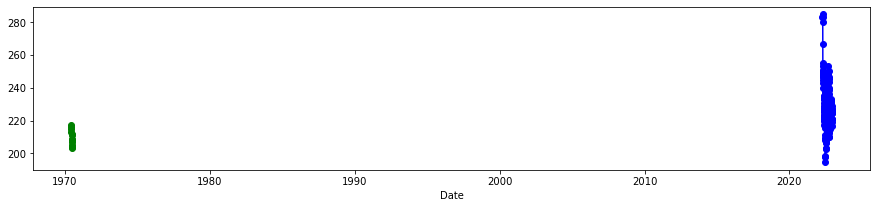

In [17]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [18]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,OPEN,Forecast
Date,,
2022-04-11,281.00,283.350000
2022-04-12,283.35,283.232500
2022-04-13,278.60,284.883375
2022-04-18,267.90,279.854456
2022-04-19,260.50,266.671721


#### Accuracy of Model

In [19]:
mean_absolute_percentage_error = np.mean(np.abs(data2.OPEN - data2.Forecast)/np.abs(data2.OPEN))*100
mean_absolute_percentage_error

1.7282645236591903

# Auto model 

In [20]:
import os 
os.chdir(r"C:\Users\HP\Desktop\Python\Machine Learning\Time Series")

In [21]:
df = pd.read_csv('Tata_Power.csv')

In [22]:
df = df.drop(['Unnamed: 1','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'No of trades '],axis=1)

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
print(type(df.Date[0]))
df = df.sort_values(by='Date',ascending=True)
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,OPEN
168,2022-04-11,281.00
167,2022-04-12,283.35
166,2022-04-13,278.60
165,2022-04-18,267.90
164,2022-04-19,260.50
...,...,...
4,2022-12-08,226.00
3,2022-12-09,225.90
2,2022-12-12,219.75
1,2022-12-13,218.80


<AxesSubplot:xlabel='Date'>

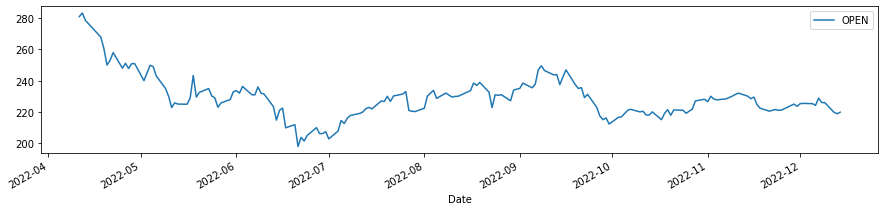

In [24]:
df.plot.line(x ='Date',y = 'OPEN',figsize=(15,3))

In [25]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [26]:
data3=df.set_index("Date")
data3.head()

,OPEN
Date,
2022-04-11,281.00
2022-04-12,283.35
2022-04-13,278.60
2022-04-18,267.90
2022-04-19,260.50


In [27]:
fit_auto= Holt(data3).fit(optimized=True) # lets software decide 
fit_auto.params

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.8822607732325708,
 'smoothing_trend': 9.82261724330263e-12,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 281.6071910734423,
 'initial_trend': -0.3665668539079895,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [28]:
data3["Forecast"]=fit_auto.fittedvalues
data3.head()

,OPEN,Forecast
Date,,
2022-04-11,281.00,281.240624
2022-04-12,283.35,280.661764
2022-04-13,278.60,282.666922
2022-04-18,267.90,278.712269
2022-04-19,260.50,268.806461


#### Accuracy of Model

In [29]:
mean_absolute_percentage_error = np.mean(np.abs(data3.OPEN - data3.Forecast)/np.abs(data3.OPEN))*100
mean_absolute_percentage_error

1.525296396589126

#### Forecast Value & Plot 

In [30]:
Forecast2 = round(fit_auto.forecast(12),0)
Forecast2

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


169    219.0
170    219.0
171    219.0
172    218.0
173    218.0
174    217.0
175    217.0
176    217.0
177    216.0
178    216.0
179    216.0
180    215.0
dtype: float64

<AxesSubplot:xlabel='Date'>

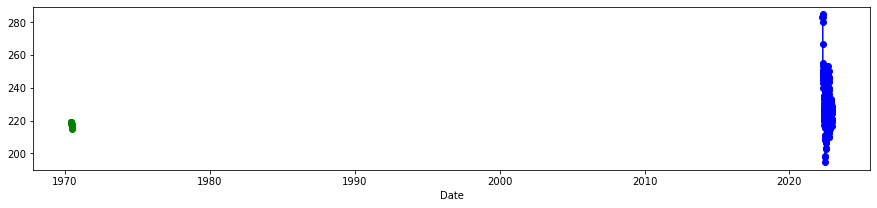

In [31]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))